In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('pulse_oxygen.csv')

# Display first few rows and summary statistics
print(df.head())
print(df.describe())

# Correcting column names (assuming these are the correct names)
df.columns = ['ID', 'Oxygen', 'PulseRate', 'Temperature', 'Result']

   ID  Oxygen  PulseRate  Temperature    Result
0   0      98         65           95  Negative
1   1      96         92           95  Negative
2   2      95         92           99  Negative
3   3      97         56           96  Negative
4   4      88         94           98  Positive
                ID        Oxygen     PulseRate   Temperature
count  10000.00000  10000.000000  10000.000000  10000.000000
mean    4999.50000     92.548900     84.976600    100.000700
std     2886.89568      4.611197     26.305841      3.185045
min        0.00000     85.000000     40.000000     95.000000
25%     2499.75000     88.000000     63.000000     97.000000
50%     4999.50000     93.000000     85.000000    100.000000
75%     7499.25000     97.000000    108.000000    103.000000
max     9999.00000    100.000000    130.000000    105.000000


**Step 1: Splitting the Data**

In [ ]:
# Separate features (X) and target variable (y)
X = df[['Oxygen', 'PulseRate', 'Temperature']]
y = df['Result']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Training the Logistic Regression Model**

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

**Step 3: Making Predictions**

In [ ]:
# Predict on the testing data
y_pred = model.predict(X_test)

**Step 4: Evaluating Performance**

Accuracy Score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


F1 Score and Classification Report

In [ ]:
from sklearn.metrics import f1_score, classification_report

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))


F1 Score: 0.92
              precision    recall  f1-score   support

    Negative       0.93      0.91      0.92      1005
    Positive       0.91      0.93      0.92       995

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



Confusion Matrix

Confusion Matrix:
[[917  88]
 [ 65 930]]


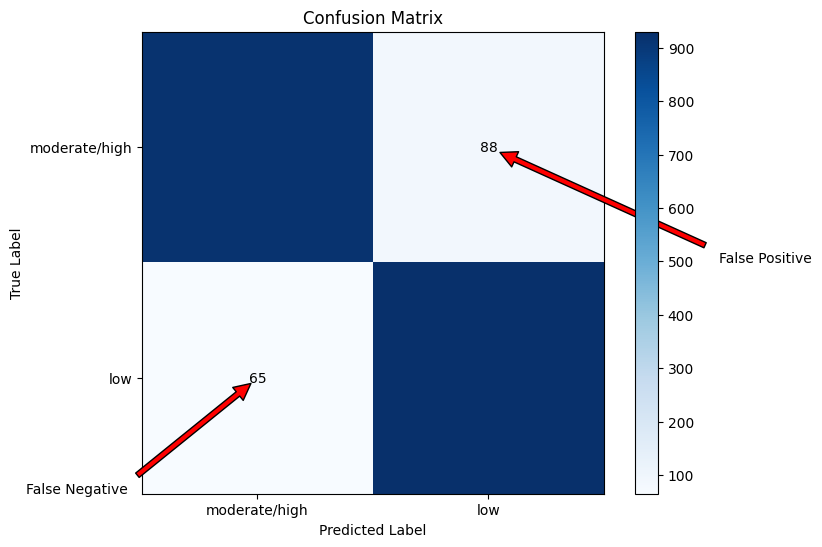

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
# Plot confusion matrix with annotations
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, ['moderate/high', 'low'])
plt.yticks(tick_marks, ['moderate/high', 'low'])

thresh = cm.max() / 2.
for i, j in [(0, 1), (1, 0)]:
    plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.annotate('False Positive', xy=(1, 0), xytext=(2, 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('False Negative', xy=(0, 1), xytext=(-1, 1.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

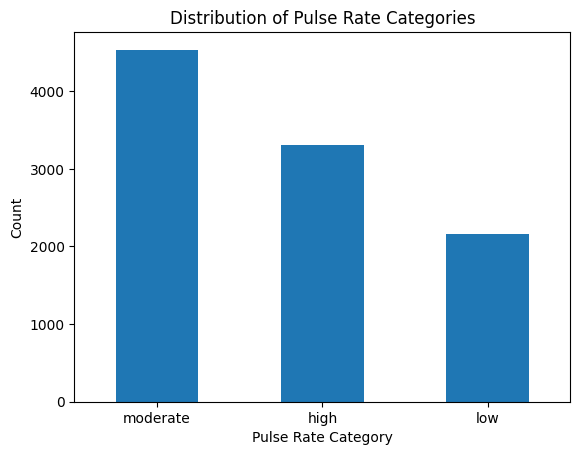

In [ ]:
# Example categorization function based on 'PulseRate' column
def categorize_pulse_rate(pulse_rate):
    if pulse_rate < 60:
        return 'low'
    elif pulse_rate >= 60 and pulse_rate <= 100:
        return 'moderate'
    else:
        return 'high'

# Apply categorization function to create a new column 'pulse_rate_category'
df['pulse_rate_category'] = df['PulseRate'].apply(categorize_pulse_rate)

# Visualize distribution of pulse rate categories
df['pulse_rate_category'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Pulse Rate Category')
plt.ylabel('Count')
plt.title('Distribution of Pulse Rate Categories')
plt.show()
# Apply categorization function to create a new column 'pulse_rate_category'
df['pulse_rate_category'] = df['PulseRate'].apply(categorize_pulse_rate)

# Assuming 'low' is considered positive, we define the confusion matrix
actual = (df['pulse_rate_category'] == 'low')
predicted = (df['pulse_rate_category'] == 'low')

# Compute confusion matrix
cm = confusion_matrix(actual, predicted, labels=[True, False])